In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

Final State: 2
Equilibrium Probabilities:
Left: 0.4707
Middle: 0.0307
Right: 0.4986


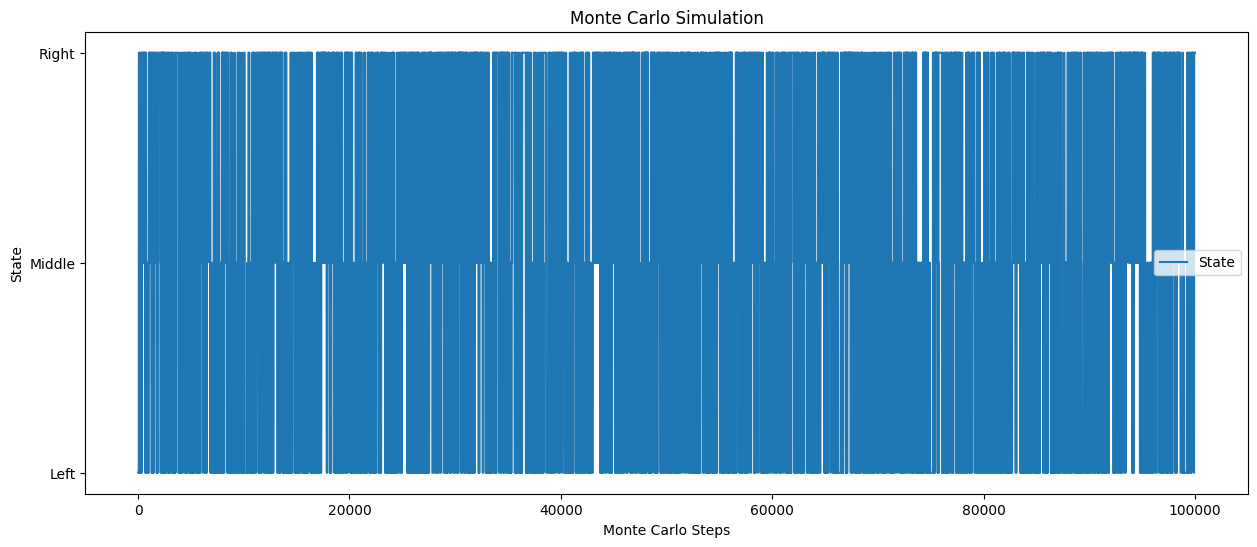

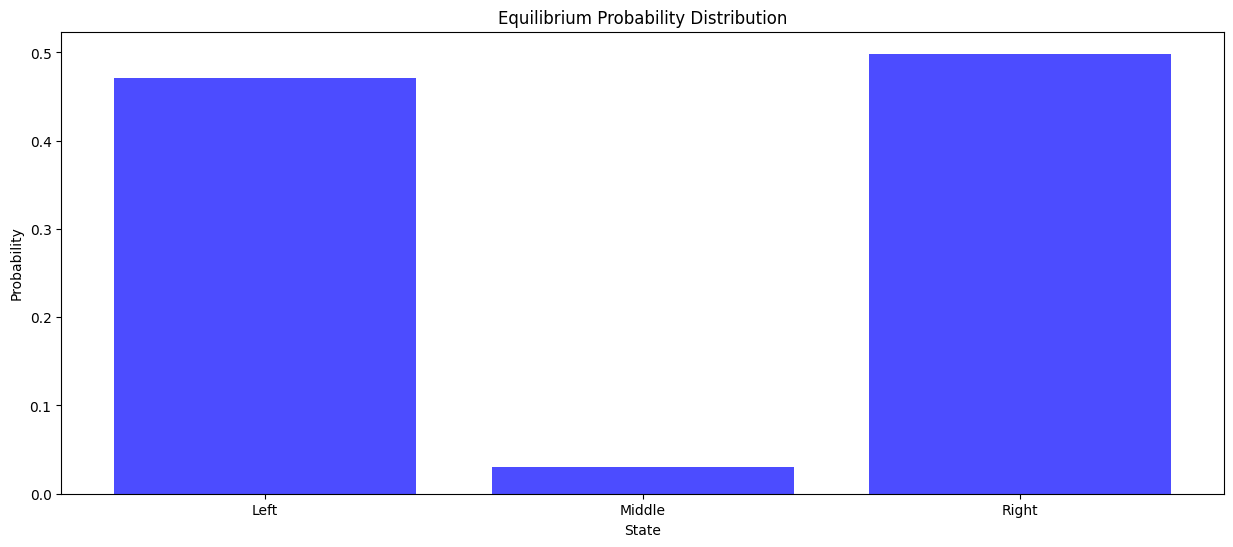

In [12]:
#Parameters
kB = 1.38*10**(-23)        #Boltzman constant kB = 1.38*10**(-23) 
T =  300   #Temperature T = 300  
Eb = 2*kB*T     #Energy barrier
steps = 10**5

# Initialize the state and the state energy
state = 0 # Left = 0, Center = 1, Rigth = 2
state_energy = [0, Eb, 0]  # Energy of each state

# Lists to store state and time data
states = []
times = []

# Calculate the partition function (Z)
Z = sum(np.exp(-E / (kB * T)) for E in state_energy)

for t in range(steps):
    states.append(state)
    times.append(t)

    # Propose a random state transition to a neighboring state
    neighbor_states = [max(state - 1, 0), state, min(state + 1, 2)]
    new_state = random.choice(neighbor_states)

    # Calculate the energy difference
    delta_energy = state_energy[new_state] - state_energy[state]

    # Calculate the acceptance probability using Boltzmann distribution
    acceptance_probability = np.exp(-delta_energy / (kB * T))/Z

    # Accept or reject the proposed change based on the acceptance probability
    if random.random() < acceptance_probability:
        state = new_state
        
# Calculate the equilibrium probability distribution
equilibrium_probabilities = [states.count(i) / steps for i in [0, 1, 2]]

# Display the final state and equilibrium probabilities
final_state = state
print(f"Final State: {final_state}")
print("Equilibrium Probabilities:")
print(f"Left: {equilibrium_probabilities[0]}")
print(f"Middle: {equilibrium_probabilities[1]}")
print(f"Right: {equilibrium_probabilities[2]}")

# Plot the state trajectory
state_labels = ["Left", "Middle", "Right"]
state_names = [state_labels[state] for state in states]

plt.figure(figsize=(15, 6))
plt.plot(times, state_names, label="State")
plt.xlabel("Monte Carlo Steps")
plt.ylabel("State")
plt.title("Monte Carlo Simulation")
plt.legend()

# Plot the equilibrium probability distribution
plt.figure(figsize=(15, 6))
plt.bar(range(3), equilibrium_probabilities, color='blue', alpha=0.7)
plt.xticks(range(3), state_labels)
plt.xlabel("State")
plt.ylabel("Probability")
plt.title("Equilibrium Probability Distribution")

plt.show()

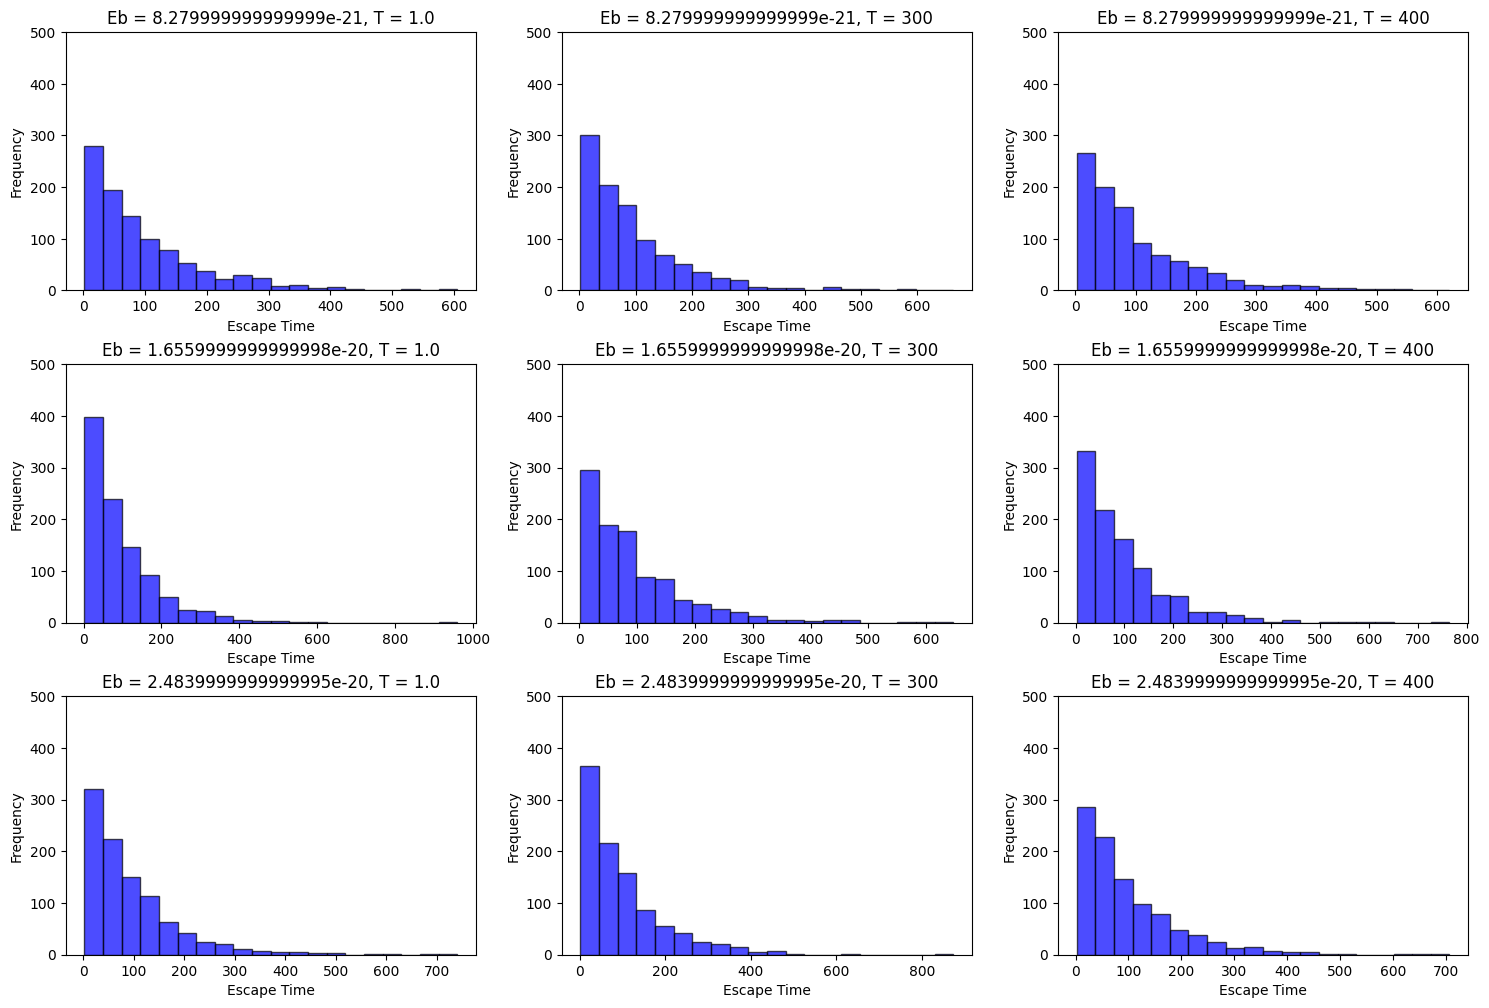

In [28]:
#Exercise 2.1 c
def monte_carlo_simulation(energy_barrier, temperature):
    state = 0
    time = 0

    while state != 2:
        # Perform a Monte Carlo step, transitioning to neighboring states
        neighbor_states = [max(state - 1, 0), state, min(state + 1, 2)]
        new_state = random.choice(neighbor_states)
        # Calculate the energy difference
        delta_energy = state_energy[new_state] - state_energy[state]

        # Calculate the acceptance probability using Boltzmann distribution
        acceptance_probability = np.exp(-delta_energy / (kB * T))/Z

        # Accept or reject the proposed change based on the acceptance probability
        if random.random() < acceptance_probability:
            state = new_state
        
        time += 1

    return time

# Parameters for the study
num_simulations = 1000  # Number of simulations to run
energy_barriers = [Eb, 2*Eb, 3*Eb]  # Different energy barriers to study
temp_list = [1.0, 300, 400]  # Different temperatures to study

# Collect escape times for different parameter combinations
escape_times = []

for e in energy_barriers:
    for temp in temp_list:
        escape_times_for_params = []
        for n in range(num_simulations):
            escape_time = monte_carlo_simulation(e, temp)
            escape_times_for_params.append(escape_time)
        escape_times.append((e, temp, escape_times_for_params))

num_rows = len(energy_barriers)
num_cols = len(temp_list)
subplot_idx = 1

# Plot and analyze the escape time distributions
plt.figure(figsize=(15, 12))


for energy, temp, escape_times in escape_times:
    plt.subplot(num_rows, num_cols, subplot_idx)
    plt.hist(escape_times, bins=20, alpha=0.7, color='b', edgecolor='black')
    plt.xlabel("Escape Time")
    plt.ylabel("Frequency")
    plt.ylim(0,500)
    plt.title(f"Eb = {energy}, T = {temp}")
    subplot_idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(bottom=0.15)
plt.show()